In [1]:
from matplotlib import pyplot as plt
from sklearn import model_selection, preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import copy, random
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm


## subscribers

In [2]:
sub = pd.read_pickle('subscribers')
sub

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,NaN,True,2020-02-08,False,NaN,NaN,ar,True,False,Standard Charter
380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,...,0.0,False,2020-03-16,False,0.0000,0.3303,ar,False,False,NaN
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,1.0,False,2019-12-22,False,0.0000,0.1101,ar,False,False,NaN
356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,...,0.0,False,2020-02-11,False,0.0000,0.0367,ar,False,False,NaN
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,...,9.0,False,2019-10-20,False,0.0000,0.0367,ar,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509326,21434712,enhanced,2.594078,comedy,supplement OTT,28.751405,1.905485,False,38.0,False,...,8.0,False,2019-12-02,False,0.0000,0.3303,ar,False,False,NaN
229587,25843074,enhanced,2.361370,comedy,replace OTT,27.301448,1.835189,True,49.0,False,...,NaN,True,2019-12-21,False,4.5875,0.3303,ar,True,False,Paypal
281340,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,False,45.0,False,...,31.0,True,2020-01-05,True,0.0000,0.0367,ar,False,False,NaN
87198,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,NaN,True,2020-02-01,False,NaN,NaN,ar,True,False,Paypal


In [3]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227628 entries, 162502 to 598241
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   subid                         227628 non-null  int64         
 1   package_type                  192054 non-null  object        
 2   num_weekly_services_utilized  117178 non-null  float64       
 3   preferred_genre               191302 non-null  object        
 4   intended_use                  224079 non-null  object        
 5   weekly_consumption_hour       189698 non-null  float64       
 6   num_ideal_streaming_services  115458 non-null  float64       
 7   retarget_TF                   227628 non-null  bool          
 8   age                           192459 non-null  float64       
 9   male_TF                       227359 non-null  object        
 10  country                       227628 non-null  object        
 11  attribut

In [4]:
sub.shape

(227628, 29)

## engagement

In [5]:
engage = pd.read_pickle('engagement')
engage

,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
1,22349235,2019-07-01,1.0,1.0,0.0,6.0,0.0,0.0,0.0
2,22349235,2019-07-02,1.0,0.0,0.0,5.0,0.0,0.0,0.0
3,22349235,2019-07-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50,20848497,2019-07-02,1.0,0.0,7.0,7.0,0.0,0.0,0.0
51,22680106,2019-07-02,2.0,1.0,7.0,7.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
28832315,28409777,2020-04-21,2.0,0.0,4.0,4.0,0.0,1.0,1.0
28832317,28409777,2020-04-22,2.0,0.0,4.0,4.0,0.0,1.0,1.0
28832319,28409777,2020-04-23,0.0,0.0,4.0,4.0,0.0,1.0,1.0
28832321,28409777,2020-04-24,1.0,0.0,3.0,4.0,1.0,1.0,1.0


In [6]:
engage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2585724 entries, 1 to 28832323
Data columns (total 9 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   subid                            int64         
 1   date                             datetime64[ns]
 2   app_opens                        float64       
 3   cust_service_mssgs               float64       
 4   num_videos_completed             float64       
 5   num_videos_more_than_30_seconds  float64       
 6   num_videos_rated                 float64       
 7   num_series_started               float64       
 8   payment_period                   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 197.3 MB


In [7]:
engage.shape

(2585724, 9)

## customer_service_reps

In [8]:
rep = pd.read_pickle('customer_service_reps')
rep

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
4,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,0,2019-11-26 03:30:29,2019-11-26 03:30:29,NaN
5,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,1,2019-11-26 03:30:29,2019-12-27 03:30:29,NaN
6,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,2,2019-12-27 03:30:29,2020-01-26 03:30:29,NaN
7,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,3,2020-01-26 03:30:29,NaT,NaN
8,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,0,2020-03-19 01:20:25,2020-04-02 01:20:25,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248409,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,3,2019-08-27 20:23:27,2019-09-24 20:23:29,NaN
2248410,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,4,2019-09-24 20:23:29,2019-10-25 20:23:28,NaN
2248411,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,5,2019-10-25 20:23:28,2019-11-24 20:23:29,NaN
2248412,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,6,2019-11-24 20:23:29,2019-12-25 20:23:27,NaN


In [9]:
rep.shape

(2208643, 13)

In [10]:
rep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2208643 entries, 4 to 2248413
Data columns (total 13 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   customer_service_rep_id  int64         
 1   subid                    int64         
 2   current_sub_TF           bool          
 3   cancel_date              datetime64[ns]
 4   account_creation_date    datetime64[ns]
 5   num_trial_days           int64         
 6   trial_completed_TF       bool          
 7   billing_channel          object        
 8   revenue_net_1month       float64       
 9   payment_period           int64         
 10  last_payment             datetime64[ns]
 11  next_payment             datetime64[ns]
 12  renew                    object        
dtypes: bool(2), datetime64[ns](4), float64(1), int64(4), object(2)
memory usage: 206.4+ MB


## advertising_spend_data

In [11]:
spend = pd.read_excel('advertising_spend_data.xlsx')
spend = spend[2:].rename(
    columns={
        'Monthly advertising spend in AED': 'date',
        'Unnamed: 1': 'fb',
        'Unnamed: 2': 'email',
        'Unnamed: 3': 'search',
        'Unnamed: 4': 'brand_sem_intent_google',
        'Unnamed: 5': 'affiliate',
        'Unnamed: 6': 'email_blast',
        'Unnamed: 7': 'pinterest',
        'Unnamed: 8': 'referral',
    }).reset_index(drop=True)
spend

,date,fb,email,search,brand_sem_intent_google,affiliate,email_blast,pinterest,referral
0,2019-06-30 00:00:00,84800,75000,17300,21400,11900,10500,5900,6100
1,2019-07-31 00:00:00,60000,75600,17300,21300,12000,29800,6000,6600
2,2019-08-31 00:00:00,52300,76100,18100,21300,16300,65900,6200,6800
3,2019-09-30 00:00:00,49000,75800,18900,21300,16400,73700,6000,7400
4,2019-10-31 00:00:00,51300,76000,21000,21400,12200,32300,6700,7300
5,2019-11-30 00:00:00,56100,75900,21400,21600,11700,9800,6300,7300
6,2019-12-31 00:00:00,51400,76100,32100,22200,12100,3500,7200,8000
7,2020-01-31 00:00:00,49000,75500,33600,22700,14300,300,6700,7400
8,2020-02-29 00:00:00,49700,76600,30100,21700,15000,300,6400,6500
9,2020-03-31 00:00:00,49100,78000,22700,21200,17600,300,5900,10000


In [12]:
spend.describe()

,date,fb,email,search,brand_sem_intent_google,affiliate,email_blast,pinterest,referral
count,10,10,10,10,10,10,10,10,10
unique,10,9,9,9,7,10,8,7,8
top,2019-06-30 00:00:00,49000,76100,17300,21300,11900,300,5900,7400
freq,1,2,2,2,3,1,3,2,2


In [13]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   date                     10 non-null     object
 1   fb                       10 non-null     object
 2   email                    10 non-null     object
 3   search                   10 non-null     object
 4   brand_sem_intent_google  10 non-null     object
 5   affiliate                10 non-null     object
 6   email_blast              10 non-null     object
 7   pinterest                10 non-null     object
 8   referral                 10 non-null     object
dtypes: object(9)
memory usage: 848.0+ bytes


In [14]:
subscribers = pd.read_pickle('subscribers')
subscribers.head(10)
subscribers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227628 entries, 162502 to 598241
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   subid                         227628 non-null  int64         
 1   package_type                  192054 non-null  object        
 2   num_weekly_services_utilized  117178 non-null  float64       
 3   preferred_genre               191302 non-null  object        
 4   intended_use                  224079 non-null  object        
 5   weekly_consumption_hour       189698 non-null  float64       
 6   num_ideal_streaming_services  115458 non-null  float64       
 7   retarget_TF                   227628 non-null  bool          
 8   age                           192459 non-null  float64       
 9   male_TF                       227359 non-null  object        
 10  country                       227628 non-null  object        
 11  attribut

# Segmentation

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [25]:
subscribers.head()
subscribers.months_per_bill_period.value_counts()
subscribers.months_per_bill_period.value_counts()

4    223942
Name: months_per_bill_period, dtype: int64

In [26]:
seg_sub = subscribers[['preferred_genre','weekly_consumption_hour','age','male_TF','op_sys']]
seg_sub = seg_sub[seg_sub['age'] >= 18]
seg_sub = seg_sub[seg_sub['preferred_genre'] != 'not_specified']
seg_sub = seg_sub[seg_sub['op_sys'] != 'not_specified']
seg_sub = seg_sub[seg_sub['weekly_consumption_hour'] != 0]
seg_sub.head()

,preferred_genre,weekly_consumption_hour,age,male_TF,op_sys
496617,regional,36.001186,25.0,True,iOS
356799,drama,20.051667,30.0,False,Android
681701,comedy,22.951579,28.0,False,iOS
192823,comedy,20.051667,61.0,False,Android
315863,drama,34.551230,23.0,False,iOS


In [27]:
seg_sub_dummy = seg_sub.join(pd.get_dummies(seg_sub[['preferred_genre','male_TF','op_sys']]))
del seg_sub_dummy['preferred_genre']
del seg_sub_dummy['male_TF']
del seg_sub_dummy['op_sys']
seg_sub_dummy.head()


,weekly_consumption_hour,age,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,male_TF_False,male_TF_True,op_sys_Android,op_sys_iOS
496617,36.001186,25.0,0,0,0,0,1,0,1,0,1
356799,20.051667,30.0,0,1,0,0,0,1,0,1,0
681701,22.951579,28.0,1,0,0,0,0,1,0,0,1
192823,20.051667,61.0,1,0,0,0,0,1,0,1,0
315863,34.551230,23.0,0,1,0,0,0,1,0,0,1


In [28]:
seg_sub_dummy.describe()

,weekly_consumption_hour,age,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,male_TF_False,male_TF_True,op_sys_Android,op_sys_iOS
count,141991.000000,141991.000000,141991.000000,141991.000000,141991.000000,141991.000000,141991.000000,141991.000000,141991.000000,141991.000000,141991.000000
mean,27.975943,45.580334,0.636111,0.247903,0.035277,0.024593,0.056116,0.868942,0.131058,0.348804,0.651196
std,4.820909,13.843092,0.481119,0.431797,0.184479,0.154882,0.230147,0.337465,0.337465,0.476593,0.476593
min,2.652191,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.401536,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,27.301448,45.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,30.201361,56.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,49.050793,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
scaler = preprocessing.StandardScaler()
segment_df_dummy_scale = pd.DataFrame(scaler.fit_transform(seg_sub_dummy[['age','weekly_consumption_hour']])).rename(columns={0:'age_scale',1:'weekly_consumption_hour_scale'})
segment_df_dummy_reindex = seg_sub_dummy.reset_index(drop=True)
segment_df_dummy_scale = pd.concat([segment_df_dummy_scale,segment_df_dummy_reindex],axis=1)
segment_df_dummy_scale.drop(columns=['age','weekly_consumption_hour'],inplace=True)

In [30]:
def fitting(df):
    Sum_of_squared_distances = []
    K = range(1,10)
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(df)
        Sum_of_squared_distances.append(km.inertia_)
    plt.plot(K, Sum_of_squared_distances, 'darkorange')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.savefig('elbowmethod.png')
    plt.show()
    return

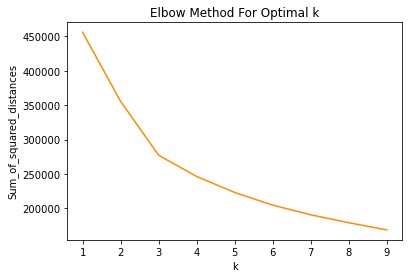

In [31]:
fitting(segment_df_dummy_scale)

In [32]:
kmeans = KMeans(n_clusters = 3, random_state=799).fit(segment_df_dummy_scale.reset_index(drop=True))
km_label = pd.DataFrame(kmeans.labels_,columns=['cluster'])
segment_df_km = pd.concat([seg_sub_dummy.reset_index(drop=True),km_label],axis=1)
segment_summary = segment_df_km.groupby('cluster')
round(segment_summary.mean(),2)

,weekly_consumption_hour,age,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,male_TF_False,male_TF_True,op_sys_Android,op_sys_iOS
cluster,,,,,,,,,,,
0,26.45,33.70,0.71,0.18,0.02,0.02,0.07,0.98,0.02,0.33,0.67
1,26.10,57.70,0.60,0.29,0.04,0.03,0.03,0.98,0.02,0.36,0.64
2,35.22,46.05,0.56,0.30,0.04,0.03,0.08,0.38,0.62,0.35,0.65


# Allocation

## Data

In [33]:
attr = sub[['account_creation_date', 'attribution_technical', 'attribution_survey']]

In [34]:
attr

,account_creation_date,attribution_technical,attribution_survey
162502,2020-01-24 21:44:16,facebook,facebook
380374,2020-03-01 15:44:35,facebook,facebook
496617,2019-12-07 16:37:06,organic,facebook
356799,2020-01-27 16:09:32,search,tv
681701,2019-10-05 12:57:07,discovery,youtube
...,...,...,...
509326,2019-11-17 14:12:33,facebook,facebook_organic
229587,2019-12-06 18:02:13,google_organic,referral
281340,2019-12-21 19:40:44,facebook,facebook
87198,2020-01-17 23:58:51,facebook,facebook


## Preprocessing

In [161]:
attr_pro = attr.copy()
attr_pro['creation_ym'] = pd.to_datetime(attr['account_creation_date']).dt.to_period('M')
attr_pro['creation_year'] = pd.to_datetime(attr['account_creation_date']).dt.to_period('Y')
attr_pro['creation_month'] = attr['account_creation_date'].dt.month

attr_pro = attr_pro.iloc[:, 1:]

attr_pivot = attr_pro[['creation_ym', 'attribution_technical']].value_counts().reset_index().rename(columns={0: 'count'})
attr_pivot = attr_pivot.pivot(index='creation_ym', columns='attribution_technical', values='count').reset_index()

attr_pivot.info()
attr_pivot = attr_pivot.iloc[:, [0, 14, 15, 12, 29, 6, 1, 13, 22, 23, 27]].fillna(0)

count = 0
while count < len(attr_pivot):
    attr_pivot['facebook'][count] = attr_pivot['facebook'][count] + attr_pivot['facebook_organic'][count]
    attr_pivot['pinterest'][count] = attr_pivot['pinterest'][count] + attr_pivot['pinterest_organic'][count]
    count += 1

attr_pivot = attr_pivot.iloc[:, [0, 1, 3, 4, 5, 6, 7, 8, 10]].rename(
    columns={'creation_ym': 'date', 'facebook': 'fb', 'brand sem intent google': 'brand_sem_intent_google'})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype    
---  ------                   --------------  -----    
 0   creation_ym              10 non-null     period[M]
 1   affiliate                10 non-null     float64  
 2   appstore                 4 non-null      float64  
 3   bing                     10 non-null     float64  
 4   bing_organic             10 non-null     float64  
 5   brand sem intent bing    10 non-null     float64  
 6   brand sem intent google  10 non-null     float64  
 7   content_greatist         4 non-null      float64  
 8   criteo                   4 non-null      float64  
 9   direct_mail              6 non-null      float64  
 10  discovery                8 non-null      float64  
 11  display                  10 non-null     float64  
 12  email                    10 non-null     float64  
 13  email_blast              10 non-null     float64  
 1

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6564\868206021.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attr_pivot['facebook'][count] = attr_pivot['facebook'][count] + attr_pivot['facebook_organic'][count]
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6564\868206021.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attr_pivot['pinterest'][count] = attr_pivot['pinterest'][count] + attr_pivot['pinterest_organic'][count]


In [162]:
attr_pivot

attribution_technical,date,fb,email,search,brand_sem_intent_google,affiliate,email_blast,pinterest,referral
0,2019-06,1335.0,308.0,106.0,197.0,78.0,108.0,36.0,22.0
1,2019-07,10217.0,3228.0,1315.0,2075.0,828.0,1500.0,791.0,521.0
2,2019-08,8210.0,2551.0,1714.0,1627.0,1809.0,1626.0,599.0,413.0
3,2019-09,5371.0,1879.0,1588.0,1235.0,938.0,1298.0,471.0,431.0
4,2019-10,7356.0,1811.0,2006.0,1290.0,733.0,808.0,633.0,393.0
5,2019-11,9820.0,1977.0,2126.0,1641.0,473.0,514.0,545.0,440.0
6,2019-12,7033.0,2074.0,3245.0,2019.0,524.0,333.0,789.0,516.0
7,2020-01,4839.0,1842.0,3501.0,2221.0,991.0,27.0,747.0,424.0
8,2020-02,6296.0,2590.0,3776.0,2011.0,1397.0,55.0,631.0,439.0
9,2020-03,5272.0,2835.0,2695.0,1497.0,1537.0,51.0,419.0,401.0


In [163]:
# attr_sum
attr_pivot.iloc[1:, :].sum().to_frame().T

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6564\2126106425.py:2: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  attr_pivot.iloc[1:, :].sum().to_frame().T


attribution_technical,fb,email,search,brand_sem_intent_google,affiliate,email_blast,pinterest,referral
0,64414.0,20787.0,21966.0,15616.0,9230.0,6212.0,5625.0,3978.0


In [164]:
copy_spend = spend.copy()

In [165]:
copy_spend

,date,fb,email,search,brand_sem_intent_google,affiliate,email_blast,pinterest,referral
0,2019-06-30 00:00:00,84800,75000,17300,21400,11900,10500,5900,6100
1,2019-07-31 00:00:00,60000,75600,17300,21300,12000,29800,6000,6600
2,2019-08-31 00:00:00,52300,76100,18100,21300,16300,65900,6200,6800
3,2019-09-30 00:00:00,49000,75800,18900,21300,16400,73700,6000,7400
4,2019-10-31 00:00:00,51300,76000,21000,21400,12200,32300,6700,7300
5,2019-11-30 00:00:00,56100,75900,21400,21600,11700,9800,6300,7300
6,2019-12-31 00:00:00,51400,76100,32100,22200,12100,3500,7200,8000
7,2020-01-31 00:00:00,49000,75500,33600,22700,14300,300,6700,7400
8,2020-02-29 00:00:00,49700,76600,30100,21700,15000,300,6400,6500
9,2020-03-31 00:00:00,49100,78000,22700,21200,17600,300,5900,10000


In [166]:
copy_spend.iloc[:-1, :].sum().to_frame().T

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6564\131163655.py:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  copy_spend.iloc[:-1, :].sum().to_frame().T


,fb,email,search,brand_sem_intent_google,affiliate,email_blast,pinterest,referral
0,503600,682600,209800,194900,121900,226100,57400,63400


## average CAC

In [167]:
cac = copy_spend.iloc[:-1, 1:].reset_index(drop=True).div(attr_pivot.iloc[1:, 1:].reset_index(drop=True), axis=0)

In [168]:
copy_spend.iloc[:-1, :].sum().to_frame().T.div(
    attr_pivot.iloc[1:, :].sum().to_frame().T,
    axis=0).T.reset_index().rename(columns={
    'index': 'channel',
    0: 'avg_cac'
}).sort_values(by='avg_cac').reset_index(drop=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6564\2633975381.py:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  copy_spend.iloc[:-1, :].sum().to_frame().T.div(
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6564\2633975381.py:2: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  attr_pivot.iloc[1:, :].sum().to_frame().T,


,channel,avg_cac
0,fb,7.818176
1,search,9.551124
2,pinterest,10.204444
3,brand_sem_intent_google,12.480789
4,affiliate,13.206934
5,referral,15.937657
6,email,32.837831
7,email_blast,36.397296


In [169]:
cac

,fb,email,search,brand_sem_intent_google,affiliate,email_blast,pinterest,referral
0,8.299892,23.234201,13.155894,10.313253,14.371981,7.0,7.458913,11.708253
1,7.308161,29.635437,10.093349,13.09158,6.633499,18.327183,10.016694,15.98063
2,9.737479,40.500266,11.397985,17.246964,17.377399,50.770416,13.163482,15.777262
3,6.661229,41.855329,9.421735,16.511628,22.373806,91.212871,9.478673,18.829517
4,5.224033,38.442084,9.877705,13.040829,25.792812,62.840467,12.293578,16.590909
5,7.976681,36.59595,6.594761,10.698366,22.328244,29.429429,7.984791,14.147287
6,10.622029,41.313789,9.168809,9.995498,12.209889,129.62963,9.638554,18.867925
7,7.782719,29.150579,8.898305,11.287916,10.23622,5.454545,10.618067,16.856492
8,9.427162,27.0194,11.168831,14.495658,9.759271,5.882353,15.274463,16.209476


In [170]:
cac.mean().reset_index().rename(columns={'index': 'channel', 0: 'avg_cac'}).sort_values(by='avg_cac').reset_index(
    drop=True)

,channel,avg_cac
0,fb,8.115487
1,search,9.975264
2,pinterest,10.658579
3,brand_sem_intent_google,12.964632
4,affiliate,15.675902
5,referral,16.107528
6,email,34.194115
7,email_blast,44.505211


# Churn

In [171]:
pd.options.display.max_columns = 25

## Functions

In [172]:
def apply_offers(df, t, bp, da, cases, arc, arn):
    df_f = copy.deepcopy(df)
    df_f['price_no_offer'] = bp
    df_f.loc[df_f['churn_TF'] == 1, 'price_no_offer'] = 0
    df_f.loc[df_f['churn_TF'] == 1, 'accept_offer_prob'] = arc
    df_f.loc[df_f['churn_TF'] == 0, 'accept_offer_prob'] = arn
    df_f['would_accept_offer_rand_draw'] = (df_f['random_draws'] < df_f['accept_offer_prob'])
    df_f['make_offer_lpm'] = (df_f['prob_churn_lpm'] > t)
    df_f['accept_offer_lpm'] = (df_f['make_offer_lpm'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_lpm_offer'] = df_f['price_no_offer']
    df_f.loc[df_f['accept_offer_lpm'], 'price_lpm_offer'] = bp * (1- da)
    df_f['make_offer_logit'] = (df_f['prob_churn_logit'] > t)
    df_f['accept_offer_logit'] = (df_f['make_offer_logit'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_logit_offer'] = df_f['price_no_offer']
    df_f.loc[df_f['accept_offer_logit'], 'price_logit_offer'] = bp * (1 - da)
    df_effect = pd.DataFrame(index=cases, columns=['subs', 'revenue', 'lift_from_no_offer'])
    for c in cases:
        df_effect.loc[c, 'subs'] = (df_f['price_' + c] > 0).sum()
        df_effect.loc[c, 'revenue'] = df_f['price_' + c].sum()
    for c in cases:
        df_effect.loc[c, 'lift_from_no_offer'] = df_effect.loc[c, 'revenue'] / df_effect.loc['no_offer', 'revenue'] - 1
    return df_f, df_effect

In [173]:
def get_gini_info(actual, pp):
    cm = list()
    for t in [x / 100 for x in range(0, 100, 33)]:
        pred = [1 if (x > t) else 0 for x in pp]
        cm.append(confusion_matrix(actual, pred))
    fp = list()
    tp = list()
    for t in cm:
        tp.append(t[1, 1])
        fp.append(t[0, 1])
    return cm, fp, tp

In [174]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191457 entries, 380374 to 598241
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   subid                         191457 non-null  int64         
 1   package_type                  156121 non-null  object        
 2   num_weekly_services_utilized  116708 non-null  float64       
 3   preferred_genre               155375 non-null  object        
 4   intended_use                  187957 non-null  object        
 5   weekly_consumption_hour       188704 non-null  float64       
 6   num_ideal_streaming_services  114993 non-null  float64       
 7   retarget_TF                   191457 non-null  bool          
 8   age                           191457 non-null  float64       
 9   male_TF                       191457 non-null  object        
 10  country                       191457 non-null  object        
 11  attribut

In [175]:
churn_reset = sub.iloc[:, [0, 8, 5, 7, 9, 20]].reset_index(drop=True)
churn_reset.info()
churn_reset['male_TF'] = churn_reset['male_TF'].apply(lambda x: int(x))
churn_reset['retarget_TF'] = churn_reset['retarget_TF'].apply(lambda x: int(x))
churn_reset['cancel_before_trial_end'] = churn_reset['cancel_before_trial_end'].apply(lambda x: int(x))
churn_reset.dropna(inplace=True)
churn_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191457 entries, 0 to 191456
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   subid                    191457 non-null  int64  
 1   age                      191457 non-null  float64
 2   weekly_consumption_hour  188704 non-null  float64
 3   retarget_TF              191457 non-null  bool   
 4   male_TF                  191457 non-null  object 
 5   cancel_before_trial_end  191457 non-null  bool   
dtypes: bool(2), float64(2), int64(1), object(1)
memory usage: 6.2+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 188704 entries, 0 to 191456
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   subid                    188704 non-null  int64  
 1   age                      188704 non-null  float64
 2   weekly_consumption_hour  188704 non-null  fl

In [176]:
churn_part = engage.iloc[:, [0, 2, 4, 5, 6, 7]]
churn_part = churn_part.groupby('subid').mean().reset_index()

In [177]:
churn_part.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135019 entries, 0 to 135018
Data columns (total 6 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   subid                            135019 non-null  int64  
 1   app_opens                        135019 non-null  float64
 2   num_videos_completed             135019 non-null  float64
 3   num_videos_more_than_30_seconds  135019 non-null  float64
 4   num_videos_rated                 135019 non-null  float64
 5   num_series_started               135019 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 6.2 MB


In [178]:
assert len(rep[['subid', 'current_sub_TF']].value_counts().reset_index()['subid'].unique()) ==  rep[['subid', 'current_sub_TF']].value_counts().reset_index().shape[0]

In [179]:
churn_val = rep[['subid', 'current_sub_TF']].value_counts().reset_index()
churn_val = churn_val[['subid', 'current_sub_TF']]
churn_val['current_sub_TF'] = churn_val['current_sub_TF'].apply(lambda x: -999 if x == False else 111)
churn_val['current_sub_TF'] = churn_val['current_sub_TF'].apply(lambda x: True if x == -999 else False)
churn_val = churn_val.rename(columns={'current_sub_TF': 'churn_TF'})

In [180]:
churn_reset_part = churn_reset.merge(churn_part, on="subid", how="left").dropna()
churn = churn_reset_part.merge(churn_val, on="subid", how="left").dropna()

In [181]:
churn

,subid,age,weekly_consumption_hour,retarget_TF,male_TF,cancel_before_trial_end,app_opens,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,churn_TF
0,26844789,25.0,36.001186,0,1,0,1.000000,6.500000,6.500000,0.000000,0.500000,True
1,29726122,61.0,20.051667,0,0,1,0.975610,4.439024,4.439024,0.146341,0.951220,False
2,20299962,23.0,34.551230,0,0,1,2.260870,1.826087,4.478261,0.000000,0.630435,False
3,24930568,73.0,25.851492,0,0,0,1.500000,1.000000,6.500000,0.000000,0.000000,True
4,21361112,24.0,37.451142,0,1,0,2.000000,1.000000,6.000000,0.000000,0.000000,True
...,...,...,...,...,...,...,...,...,...,...,...,...
110438,25492551,32.0,30.201361,0,0,0,1.500000,6.000000,6.500000,0.000000,0.500000,True
110439,25549852,61.0,28.751405,0,0,0,1.000000,0.000000,6.000000,0.000000,0.000000,True
110440,25835684,43.0,24.401536,0,0,0,2.583333,3.916667,4.916667,0.000000,0.666667,True
110441,21434712,38.0,28.751405,0,0,0,1.777778,2.222222,4.000000,0.000000,0.222222,True


In [182]:
churn['churn_TF'].value_counts()

True     93218
False    17225
Name: churn_TF, dtype: int64

In [183]:
churn.columns

Index(['subid', 'age', 'weekly_consumption_hour', 'retarget_TF', 'male_TF',
       'cancel_before_trial_end', 'app_opens', 'num_videos_completed',
       'num_videos_more_than_30_seconds', 'num_videos_rated',
       'num_series_started', 'churn_TF'],
      dtype='object')

In [184]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110443 entries, 0 to 110442
Data columns (total 12 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   subid                            110443 non-null  int64  
 1   age                              110443 non-null  float64
 2   weekly_consumption_hour          110443 non-null  float64
 3   retarget_TF                      110443 non-null  int64  
 4   male_TF                          110443 non-null  int64  
 5   cancel_before_trial_end          110443 non-null  int64  
 6   app_opens                        110443 non-null  float64
 7   num_videos_completed             110443 non-null  float64
 8   num_videos_more_than_30_seconds  110443 non-null  float64
 9   num_videos_rated                 110443 non-null  float64
 10  num_series_started               110443 non-null  float64
 11  churn_TF                         110443 non-null  bool   
dtypes:

,age,weekly_consumption_hour,retarget_TF,male_TF,cancel_before_trial_end,app_opens,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,churn_TF
age,1.000000,-0.031305,0.007570,0.031536,0.066595,0.001271,-0.103940,0.001769,0.078785,0.010944,-0.097562
weekly_consumption_hour,-0.031305,1.000000,-0.022363,0.560573,0.075948,0.006655,-0.029154,-0.025855,-0.000243,0.010226,-0.090913
retarget_TF,0.007570,-0.022363,1.000000,-0.035977,0.015191,0.004551,0.004315,-0.010293,0.014417,0.018819,-0.010606
male_TF,0.031536,0.560573,-0.035977,1.000000,0.110944,-0.006590,-0.076205,-0.037614,-0.001399,-0.002423,-0.141985
cancel_before_trial_end,0.066595,0.075948,0.015191,0.110944,1.000000,0.052852,-0.065245,-0.252200,0.315578,0.238819,-0.584130
app_opens,0.001271,0.006655,0.004551,-0.006590,0.052852,1.000000,0.310786,0.143108,0.062896,0.350558,-0.087898
num_videos_completed,-0.103940,-0.029154,0.004315,-0.076205,-0.065245,0.310786,1.000000,0.439797,0.168188,0.557377,0.011516
num_videos_more_than_30_seconds,0.001769,-0.025855,-0.010293,-0.037614,-0.252200,0.143108,0.439797,1.000000,-0.058146,0.058834,0.155299
num_videos_rated,0.078785,-0.000243,0.014417,-0.001399,0.315578,0.062896,0.168188,-0.058146,1.000000,0.273355,-0.253766
num_series_started,0.010944,0.010226,0.018819,-0.002423,0.238819,0.350558,0.557377,0.058834,0.273355,1.000000,-0.209967


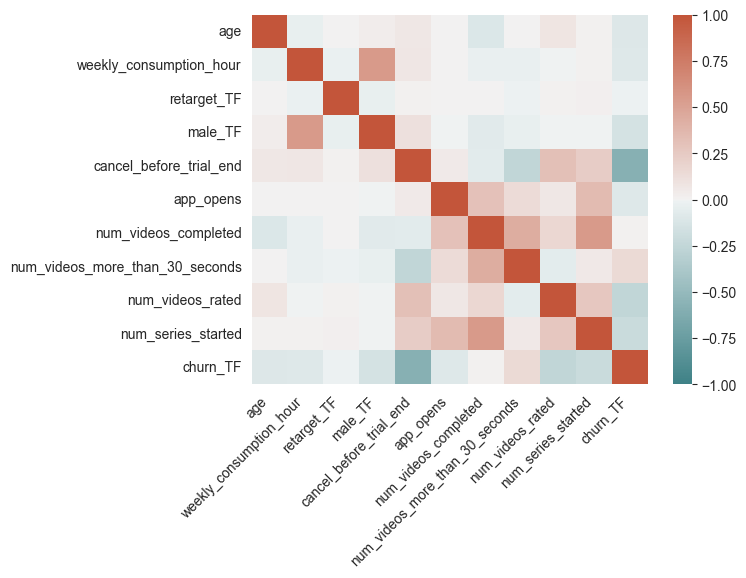

In [185]:
corr = churn.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]].corr()
ax = sns.heatmap(corr,
                 vmin=-1,
                 vmax=1,
                 center=0,
                 cmap=sns.diverging_palette(200, 20, as_cmap=True),
                 )
ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=45,
                   horizontalalignment='right')
corr

In [186]:
churn['churn_TF'].value_counts()

True     93218
False    17225
Name: churn_TF, dtype: int64

## Data Preprocessing

In [187]:
churn_sub = sub.iloc[:, [0, 2, 5, 8, 16, 24, 1, 3, 4, 7, 9, 13, 20, 27]].reset_index(drop=True)

churn_sub['num_weekly_services_utilized'] = churn_sub['num_weekly_services_utilized'].fillna(0.0)
churn_sub['weekly_consumption_hour'] = churn_sub['weekly_consumption_hour'].fillna(0.0)
churn_sub['preferred_genre'] = churn_sub['preferred_genre'].fillna('unknown')
churn_sub['intended_use'] = churn_sub['intended_use'].fillna('unknown')
churn_sub.dropna(inplace=True)
churn_sub.reset_index(drop=True, inplace=True)

churn_sub['retarget_TF'] = churn_sub['retarget_TF'].apply(lambda x: int(x))
churn_sub['male_TF'] = churn_sub['male_TF'].apply(lambda x: int(x))
churn_sub['op_sys'] = churn_sub['op_sys'].apply(lambda x: 1 if x == 'Android' else 0)
churn_sub['cancel_before_trial_end'] = churn_sub['cancel_before_trial_end'].apply(lambda x: int(x))
churn_sub['refund_after_trial_TF'] = churn_sub['refund_after_trial_TF'].apply(lambda x: int(x))

col = 'age'
conditions = [(churn_sub[col] > 13) & (churn_sub[col] <= 20),
              (churn_sub[col] > 20) & (churn_sub[col] <= 40),
              (churn_sub[col] > 40) & (churn_sub[col] <= 60),
              (churn_sub[col] > 60)]
choices = ["teenagers", 'adults', 'middle_aged_adults', 'retired']
churn_sub['age'] = np.select(conditions, choices)

churn_dummy = pd.get_dummies(churn_sub,
                             columns=['preferred_genre', 'intended_use', 'package_type', 'age'],
                             prefix=['genre:', 'use:', 'package:', 'age_range:'])

In [188]:

churn_TF = rep[['subid', 'current_sub_TF', 'payment_period']].groupby('subid').max('payment_period').reset_index()
churn_TF['current_sub_TF'] = churn_TF['current_sub_TF'].apply(lambda x: -999 if x == False else 111)
churn_TF['current_sub_TF'] = churn_TF['current_sub_TF'].apply(lambda x: True if x == -999 else False)
churn_TF = churn_TF.rename(columns={'current_sub_TF': 'churn_TF'})

churn_eng = engage.iloc[:, [0, 2, 4, 5, 6, 7]]
churn_eng = churn_eng.groupby('subid').mean().reset_index()

churn_sub_merge_half = churn_TF.merge(churn_dummy, on='subid', how='left').dropna().reset_index(drop=True)
churn_sub_merge = churn_sub_merge_half.merge(churn_eng, on='subid', how='left').dropna().reset_index(drop=True)
churn_sub_merge['payment_period'] = churn_sub_merge['payment_period'].astype(float)

In [189]:
churn_sub_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86273 entries, 0 to 86272
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   subid                             86273 non-null  int64  
 1   churn_TF                          86273 non-null  bool   
 2   payment_period                    86273 non-null  float64
 3   num_weekly_services_utilized      86273 non-null  float64
 4   weekly_consumption_hour           86273 non-null  float64
 5   monthly_price                     86273 non-null  float64
 6   join_fee                          86273 non-null  float64
 7   retarget_TF                       86273 non-null  float64
 8   male_TF                           86273 non-null  float64
 9   op_sys                            86273 non-null  float64
 10  cancel_before_trial_end           86273 non-null  float64
 11  refund_after_trial_TF             86273 non-null  float64
 12  genr

,payment_period,num_weekly_services_utilized,weekly_consumption_hour,monthly_price,join_fee,app_opens,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started
payment_period,1.000000,0.202320,0.088529,0.016651,0.020490,0.061847,-0.056974,-0.235643,0.343546,0.239731
num_weekly_services_utilized,0.202320,1.000000,0.148694,-0.002238,0.012590,0.187113,0.294937,-0.046699,0.125308,0.669150
weekly_consumption_hour,0.088529,0.148694,1.000000,-0.004785,0.039944,-0.001229,-0.032399,-0.029044,0.004698,0.012089
monthly_price,0.016651,-0.002238,-0.004785,1.000000,-0.025381,-0.008020,-0.009422,-0.013321,0.002262,0.001100
join_fee,0.020490,0.012590,0.039944,-0.025381,1.000000,-0.012644,-0.050971,-0.009314,0.013896,-0.000701
app_opens,0.061847,0.187113,-0.001229,-0.008020,-0.012644,1.000000,0.323799,0.140953,0.059624,0.364884
num_videos_completed,-0.056974,0.294937,-0.032399,-0.009422,-0.050971,0.323799,1.000000,0.429062,0.154346,0.546454
num_videos_more_than_30_seconds,-0.235643,-0.046699,-0.029044,-0.013321,-0.009314,0.140953,0.429062,1.000000,-0.062347,0.037205
num_videos_rated,0.343546,0.125308,0.004698,0.002262,0.013896,0.059624,0.154346,-0.062347,1.000000,0.260348
num_series_started,0.239731,0.669150,0.012089,0.001100,-0.000701,0.364884,0.546454,0.037205,0.260348,1.000000


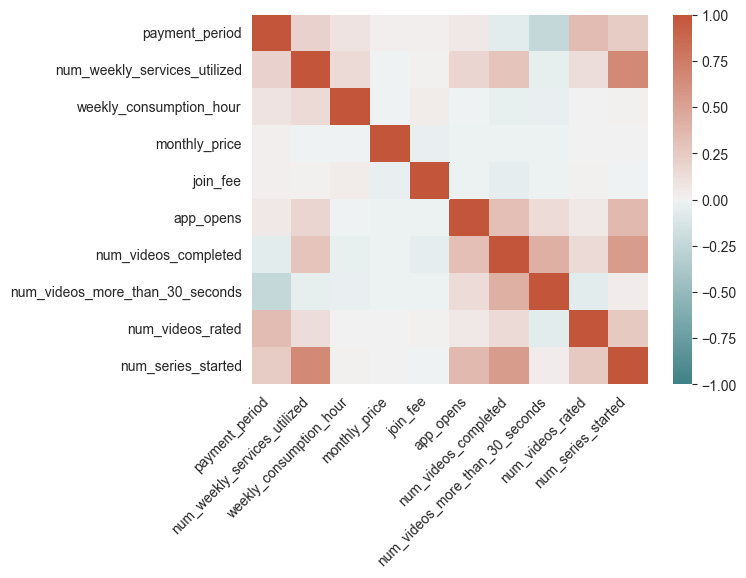

In [190]:
corr = churn_sub_merge.iloc[:, [2, 3, 4, 5, 6, 33, 34, 35, 36, 37]].corr()
ax = sns.heatmap(corr,
                 vmin=-1,
                 vmax=1,
                 center=0,
                 cmap=sns.diverging_palette(200, 20, as_cmap=True),
                 )
ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=45,
                   horizontalalignment='right')
corr

In [191]:
engage['num_videos_rated'].value_counts()

0.0     2424308
1.0      107745
2.0       15728
3.0        2553
4.0         590
5.0         135
6.0          33
7.0          12
8.0           4
9.0           3
11.0          1
12.0          1
Name: num_videos_rated, dtype: int64

In [192]:
churn_sub_merge.describe()

,subid,payment_period,num_weekly_services_utilized,weekly_consumption_hour,monthly_price,join_fee,retarget_TF,male_TF,op_sys,cancel_before_trial_end,refund_after_trial_TF,genre:_comedy,...,package:_base,package:_economy,package:_enhanced,age_range:_adults,age_range:_middle_aged_adults,age_range:_retired,age_range:_teenagers,app_opens,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started
count,8.627300e+04,86273.000000,86273.000000,86273.000000,86273.000000,86273.000000,86273.000000,86273.000000,86273.000000,86273.000000,86273.000000,86273.000000,...,86273.000000,86273.000000,86273.000000,86273.000000,86273.000000,86273.000000,86273.000000,86273.000000,86273.000000,86273.000000,86273.000000,86273.000000
mean,2.500014e+07,0.327971,2.131020,27.981819,4.735271,0.137269,0.032432,0.129554,0.341347,0.317805,0.032316,0.627404,...,0.557301,0.096299,0.346400,0.368910,0.455913,0.158265,0.016911,1.814770,2.533814,4.828881,0.013708,0.432653
std,2.886058e+06,0.576805,1.498912,5.045052,0.020001,0.189916,0.177145,0.335814,0.474164,0.465626,0.176839,0.483499,...,0.496709,0.295003,0.475825,0.482512,0.498055,0.364991,0.128940,1.548133,1.639941,1.230223,0.063427,0.361937
min,2.000040e+07,0.000000,0.000000,0.000000,4.000300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.249468e+07,0.000000,0.000000,24.401536,4.734300,0.036700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.142857,4.333333,0.000000,0.000000
50%,2.499692e+07,0.000000,2.546947,27.301448,4.734300,0.036700,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.250000,2.400000,4.823529,0.000000,0.416667
75%,2.751351e+07,1.000000,2.994681,30.201361,4.734300,0.330300,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.189189,3.767442,5.500000,0.000000,0.777778
max,2.999982e+07,3.000000,9.858013,75.150006,5.101300,0.734000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45.250000,13.000000,15.000000,2.782609,2.000000


## Churn Model

In [193]:
random.seed(0)
df_train, df_test = model_selection.train_test_split(churn_sub_merge, test_size=0.4)

In [194]:
churn_sub_merge.columns

Index(['subid', 'churn_TF', 'payment_period', 'num_weekly_services_utilized',
       'weekly_consumption_hour', 'monthly_price', 'join_fee', 'retarget_TF',
       'male_TF', 'op_sys', 'cancel_before_trial_end', 'refund_after_trial_TF',
       'genre:_comedy', 'genre:_drama', 'genre:_international', 'genre:_other',
       'genre:_regional', 'genre:_unknown', 'use:_access to exclusive content',
       'use:_education', 'use:_expand international access',
       'use:_expand regional access', 'use:_other', 'use:_replace OTT',
       'use:_supplement OTT', 'use:_unknown', 'package:_base',
       'package:_economy', 'package:_enhanced', 'age_range:_adults',
       'age_range:_middle_aged_adults', 'age_range:_retired',
       'age_range:_teenagers', 'app_opens', 'num_videos_completed',
       'num_videos_more_than_30_seconds', 'num_videos_rated',
       'num_series_started'],
      dtype='object')

In [195]:

y_col_name = 'churn_TF'
x_col_name = [
    'num_weekly_services_utilized', 'payment_period',
    'weekly_consumption_hour', 'join_fee', 'retarget_TF', 'monthly_price',
    'male_TF', 'op_sys',
    'genre:_comedy', 'genre:_drama', 'genre:_international', 'genre:_other',
    'genre:_regional', 'use:_access to exclusive content', 'genre:_unknown',
    'use:_education', 'use:_expand international access',
    'use:_expand regional access', 'use:_other', 'use:_replace OTT',
    'use:_supplement OTT', 'package:_base', 'use:_unknown',
    'package:_economy', 'package:_enhanced', 'age_range:_adults',
    'age_range:_middle_aged_adults', 'age_range:_retired',
    'age_range:_teenagers', 'app_opens', 'num_videos_completed',
    'num_videos_rated',
    'num_series_started'
]
status = True
if status:
    x_col_name.append('const')
    df_train = sm.add_constant(df_train)
    df_test = sm.add_constant(df_test)

In [196]:

lpm_model = sm.OLS(endog=df_train[y_col_name], exog=df_train[x_col_name])
lpm_results = lpm_model.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(lpm_results.summary())


RESULTS OF LOGIT MODEL FITTING

                            OLS Regression Results                            
Dep. Variable:               churn_TF   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     2704.
Date:                Thu, 15 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:02:38   Log-Likelihood:                 816.95
No. Observations:               51763   AIC:                            -1574.
Df Residuals:                   51733   BIC:                            -1308.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [197]:

logit_model = sm.Logit(endog=df_train[y_col_name], exog=df_train[x_col_name])
logit_results = logit_model.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(logit_results.summary())

Optimization terminated successfully.
         Current function value: 0.162350
         Iterations 9

RESULTS OF LOGIT MODEL FITTING

                           Logit Regression Results                           
Dep. Variable:               churn_TF   No. Observations:                51763
Model:                          Logit   Df Residuals:                    51733
Method:                           MLE   Df Model:                           29
Date:                Thu, 15 Dec 2022   Pseudo R-squ.:                  0.6469
Time:                        21:02:38   Log-Likelihood:                -8403.7
converged:                       True   LL-Null:                       -23800.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
num_weekly_services_utilized   

31794    1.000609
2266     1.032778
83648    1.001077
455      1.036952
11039    0.480579
           ...   
45911    0.985677
33030    0.939651
52238    0.079423
21420    0.922334
1306     1.010053
Name: prob_churn_lpm, Length: 34510, dtype: float64
31794    0.996570
2266     0.997639
83648    0.994953
455      0.998161
11039    0.499211
           ...   
45911    0.994887
33030    0.987900
52238    0.019625
21420    0.985096
1306     0.995327
Name: prob_churn_logit, Length: 34510, dtype: float64


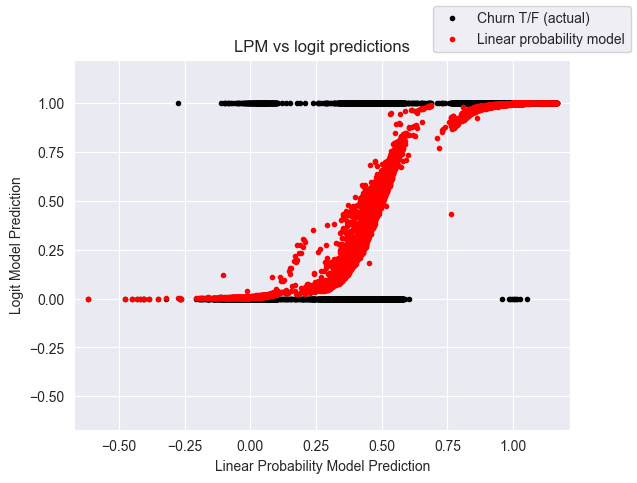

In [198]:

df_test['prob_churn_lpm'] = lpm_results.predict(df_test[x_col_name])
df_test['prob_churn_logit'] = logit_results.predict(df_test[x_col_name])
print(df_test['prob_churn_lpm'])
print(df_test['prob_churn_logit'])
fig = plt.figure()
ax = plt.gca()
ax.plot(df_test['prob_churn_lpm'].tolist(), df_test['churn_TF'].tolist(), 'k.')
ax.plot(df_test['prob_churn_lpm'].tolist(), df_test['prob_churn_logit'].tolist(), 'r.')
plt.ylim(df_test[['prob_churn_lpm', 'prob_churn_logit']].min().min()-.05, df_test[['prob_churn_lpm', 'prob_churn_logit']].max().max()+.05)
plt.xlim(ax.get_ylim())
plt.title('LPM vs logit predictions')
plt.xlabel('Linear Probability Model Prediction')
plt.ylabel('Logit Model Prediction')
fig.legend(labels=['Churn T/F (actual)', 'Linear probability model', 'Logit probability'])

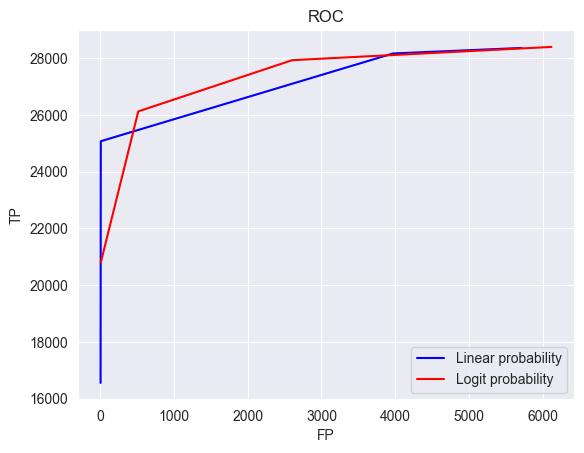

In [199]:

logit_conf_mat, lfp, ltp = get_gini_info(df_test['churn_TF'],  df_test['prob_churn_logit'])
lpm_conf_mat, mfp, mtp = get_gini_info(df_test['churn_TF'], df_test['prob_churn_lpm'])
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(mfp, mtp, 'b-')
ax1.plot(lfp, ltp, 'r-')
plt.title('ROC')
plt.xlabel('FP')
plt.ylabel('TP')
plt.legend(labels=['Linear probability', 'Logit probability'])

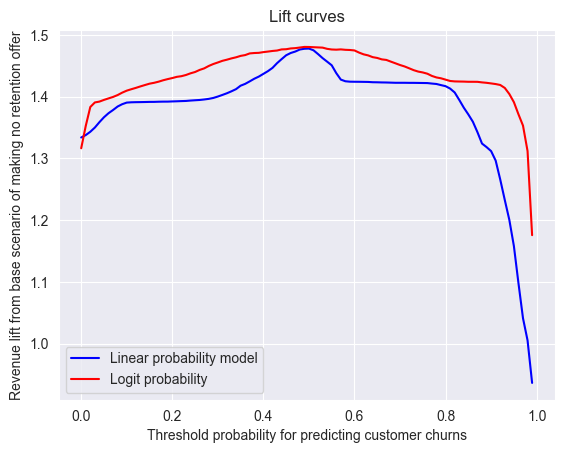

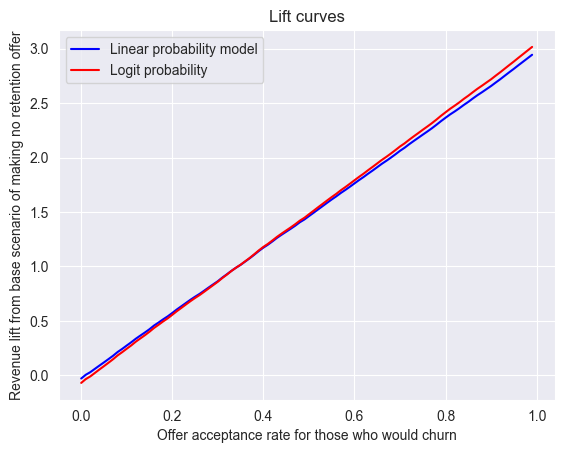

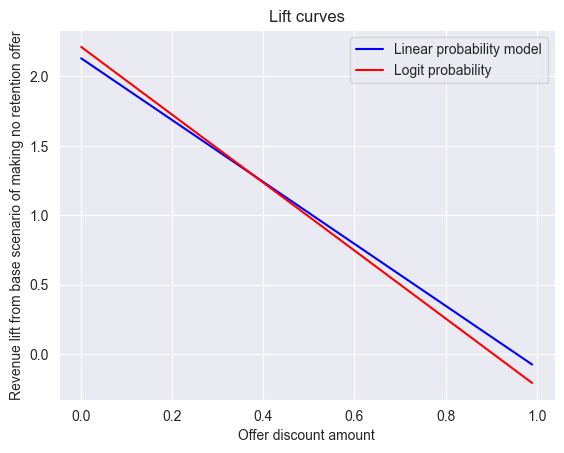

In [200]:

acceptance_rate_nonchurn = 1
acceptance_rate_churn = 0.5
threshold = 0.53
base_price = 4.73
discount_amount = 0.3
cases = ['no_offer', 'lpm_offer', 'logit_offer']
df_test['random_draws'] = np.random.random(df_test.shape[0])
df_test, df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, acceptance_rate_churn,
                                  acceptance_rate_nonchurn)
dt = pd.DataFrame(index=range(0, 100, 1), columns=['threshold'] + cases)
for t_ind in dt.index:
    t_threshold = t_ind / 100
    _, temp_impact = apply_offers(df_test, t_threshold, base_price, discount_amount, cases, acceptance_rate_churn,
                                  acceptance_rate_nonchurn)
    dt.loc[t_ind, 'threshold'] = t_threshold
    dt.loc[t_ind, cases] = temp_impact.loc[cases, 'lift_from_no_offer']
del temp_impact, t_threshold, t_ind

rate_churn = pd.DataFrame(index=range(0, 100, 1), columns=['acceptance_rate_churn'] + cases)
for t_ind in rate_churn.index:
    t_acceptance_rate_churn = t_ind / 100
    _, temp_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, t_acceptance_rate_churn,
                                  acceptance_rate_nonchurn)
    rate_churn.loc[t_ind, 'acceptance_rate_churn'] = t_acceptance_rate_churn
    rate_churn.loc[t_ind, cases] = temp_impact.loc[cases, 'lift_from_no_offer']
del temp_impact, t_acceptance_rate_churn, t_ind

discount_amount = pd.DataFrame(index=range(0, 100, 1), columns=['discount_amount'] + cases)
for t_ind in discount_amount.index:
    t_discount_amount = t_ind / 100
    t_acceptance_rate_churn = t_discount_amount ** 2
    _, temp_impact = apply_offers(df_test, threshold, base_price, t_discount_amount, cases, acceptance_rate_churn,
                                  acceptance_rate_nonchurn)
    discount_amount.loc[t_ind, 'discount_amount'] = t_discount_amount
    discount_amount.loc[t_ind, cases] = temp_impact.loc[cases, 'lift_from_no_offer']
del temp_impact, t_discount_amount, t_ind

fig = plt.figure()
ax1 = plt.gca()
ax1.plot(dt['threshold'], dt['lpm_offer'], 'b-')
ax1.plot(dt['threshold'], dt['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Threshold probability for predicting customer churns')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])


fig = plt.figure()
ax1 = plt.gca()
ax1.plot(rate_churn['acceptance_rate_churn'], rate_churn['lpm_offer'], 'b-')
ax1.plot(rate_churn['acceptance_rate_churn'], rate_churn['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer acceptance rate for those who would churn')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

fig = plt.figure()
ax1 = plt.gca()
ax1.plot(discount_amount['discount_amount'], discount_amount['lpm_offer'], 'b-')
ax1.plot(discount_amount['discount_amount'], discount_amount['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer discount amount')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

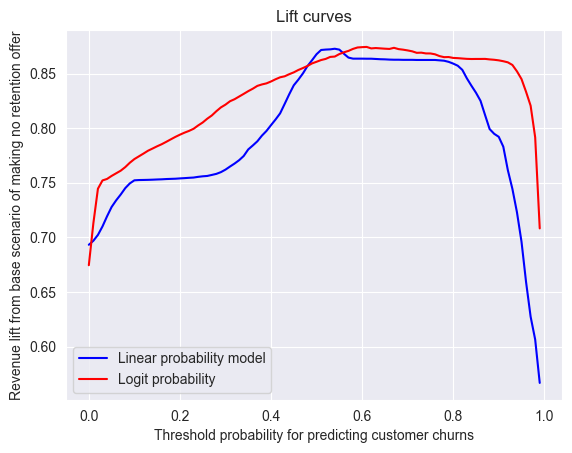

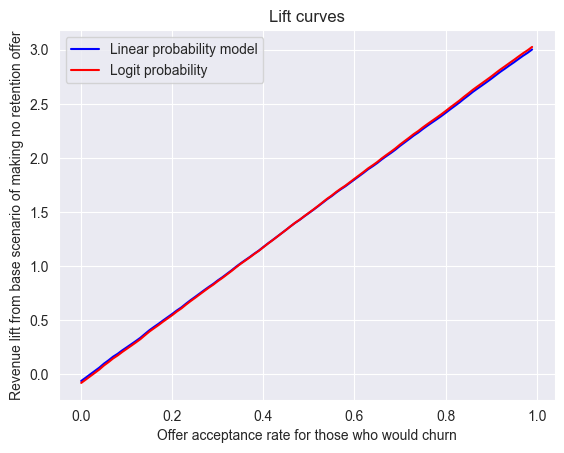

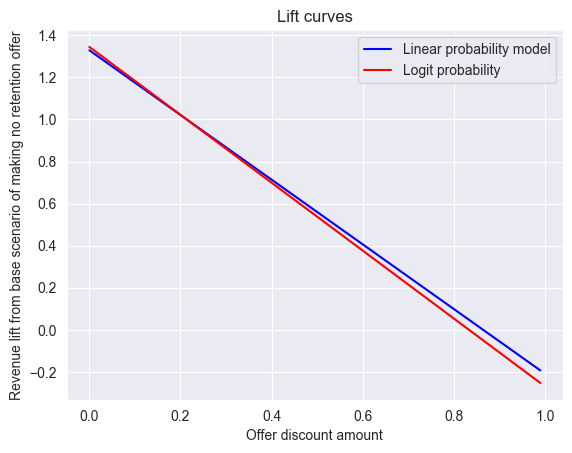

In [201]:

acceptance_rate_nonchurn = 1
acceptance_rate_churn = 0.3
threshold = 0.5
base_price = 4.9
discount_amount = 0.3
cases = ['no_offer', 'lpm_offer', 'logit_offer']
df_test['random_draws'] = np.random.random(df_test.shape[0])
df_test, df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, acceptance_rate_churn,
                                  acceptance_rate_nonchurn)
dt = pd.DataFrame(index=range(0, 100, 1), columns=['threshold'] + cases)
for t_ind in dt.index:
    t_threshold = t_ind / 100
    _, temp_impact = apply_offers(df_test, t_threshold, base_price, discount_amount, cases, acceptance_rate_churn,
                                  acceptance_rate_nonchurn)
    dt.loc[t_ind, 'threshold'] = t_threshold
    dt.loc[t_ind, cases] = temp_impact.loc[cases, 'lift_from_no_offer']
del temp_impact, t_threshold, t_ind
rate_churn = pd.DataFrame(index=range(0, 100, 1), columns=['acceptance_rate_churn'] + cases)
for t_ind in rate_churn.index:
    t_acceptance_rate_churn = t_ind / 100
    _, temp_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, t_acceptance_rate_churn,
                                  acceptance_rate_nonchurn)
    rate_churn.loc[t_ind, 'acceptance_rate_churn'] = t_acceptance_rate_churn
    rate_churn.loc[t_ind, cases] = temp_impact.loc[cases, 'lift_from_no_offer']
del temp_impact, t_acceptance_rate_churn, t_ind
discount_amount = pd.DataFrame(index=range(0, 100, 1), columns=['discount_amount'] + cases)
for t_ind in discount_amount.index:
    t_discount_amount = t_ind / 100
    _, temp_impact = apply_offers(df_test, threshold, base_price, t_discount_amount, cases, acceptance_rate_churn,
                                  acceptance_rate_nonchurn)
    discount_amount.loc[t_ind, 'discount_amount'] = t_discount_amount
    discount_amount.loc[t_ind, cases] = temp_impact.loc[cases, 'lift_from_no_offer']
del temp_impact, t_discount_amount, t_ind
# --- plot lift curves
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(dt['threshold'], dt['lpm_offer'], 'b-')
ax1.plot(dt['threshold'], dt['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Threshold probability for predicting customer churns')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(rate_churn['acceptance_rate_churn'], rate_churn['lpm_offer'], 'b-')
ax1.plot(rate_churn['acceptance_rate_churn'], rate_churn['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer acceptance rate for those who would churn')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(discount_amount['discount_amount'], discount_amount['lpm_offer'], 'b-')
ax1.plot(discount_amount['discount_amount'], discount_amount['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer discount amount')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])